# Supply Chain Optimization through Data Analysis

In [1]:
%matplotlib inline 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
db = pd.read_excel('raw_data_file.xlsx')

In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135072 entries, 0 to 135071
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   ID                           135072 non-null  int64         
 1   Fulfillment Status           130080 non-null  object        
 2   Accepts Marketing            130080 non-null  object        
 3   Subtotal                     130080 non-null  float64       
 4   Shipping                     130080 non-null  float64       
 5   Taxes                        130080 non-null  float64       
 6   Total                        130080 non-null  float64       
 7   Discount Code                5376 non-null    object        
 8   Discount Amount              130080 non-null  float64       
 9   Shipping Method              124272 non-null  object        
 10  Created Date                 135072 non-null  datetime64[ns]
 11  Lineitem quantity         

## Tracking Weekly Performance:

In [5]:
db['Created Date'] = pd.to_datetime(db['Created Date'], errors='coerce')

In [6]:
db['week']=db['Created Date'].dt.isocalendar().week

In [7]:
db['year'] = db['Created Date'].dt.isocalendar().year
weekly_revenue = db.groupby(['year', 'week'])['Total'].sum().reset_index(name='Weekly Revenue')

In [8]:
weekly_revenue['Change'] = weekly_revenue['Weekly Revenue'].diff().fillna(0)

weekly_revenue['Change (%)'] = (
    (weekly_revenue['Change'] / weekly_revenue['Weekly Revenue'].shift(1).replace(0, pd.NA)) * 100).fillna(0)

weekly_revenue

,year,week,Weekly Revenue,Change,Change (%)
0,2020,49,287856.00,0.00,0.000000
1,2020,50,2299648.00,2011792.00,698.888333
2,2020,51,3706944.00,1407296.00,61.196148
3,2020,52,382208.00,-3324736.00,-89.689405
4,2020,53,223888.00,-158320.00,-41.422472
5,2021,1,925936.00,702048.00,313.571071
6,2021,2,579550.08,-346385.92,-37.409272
7,2021,3,2366816.00,1787265.92,308.388521
8,2021,4,5245376.00,2878560.00,121.621622
9,2021,5,4218688.00,-1026688.00,-19.573201


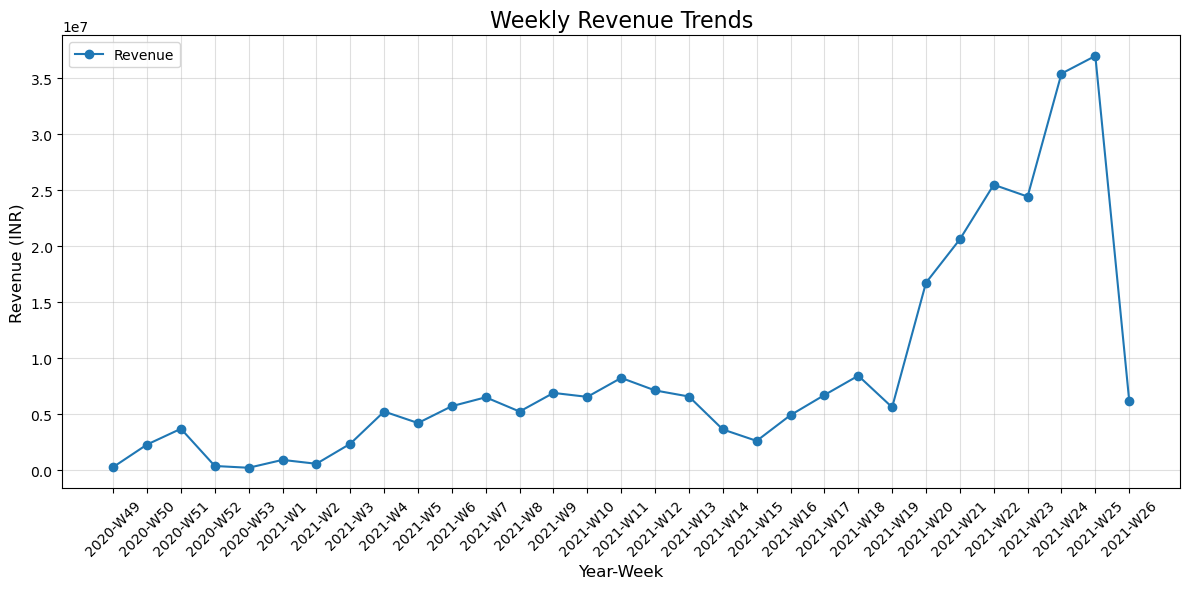

In [9]:
weekly_revenue['Year-Week'] = weekly_revenue['year'].astype(str) + '-W' + weekly_revenue['week'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(weekly_revenue['Year-Week'], weekly_revenue['Weekly Revenue'], marker='o', label="Revenue")
plt.title("Weekly Revenue Trends", fontsize=16)
plt.xlabel("Year-Week", fontsize=12)
plt.ylabel("Revenue (INR)", fontsize=12)
plt.grid(alpha=0.4)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for clarity

plt.legend()
plt.tight_layout()
plt.show()

## Understanding Product Trends: 

In [10]:
city_name_mapping = {
    "bangalore": "bengaluru",
    "bangaluru": "bengaluru",
    "new delhi": "delhi",
    "delhi": "delhi",
    "gurgaon": "gurugram",
    "gurugram": "gurugram",
    "mumbai": "mumbai"
}

db['Shipping City'] = db['Shipping City'].str.lower().str.strip().replace(city_name_mapping)

top_cities = db.groupby('Shipping City')['Total'].sum().reset_index(name='City Revenue').sort_values(by='City Revenue', ascending=False).head(10).reset_index(drop=True)

top_cities

,Shipping City,City Revenue
0,mumbai,55522576.00
1,bengaluru,36310462.08
2,delhi,23987984.00
3,pune,14218480.00
4,hyderabad,13494032.00
5,gurugram,12261056.00
6,ahmedabad,6137728.00
7,chennai,5597200.00
8,kolkata,4429776.00
9,noida,3412688.00


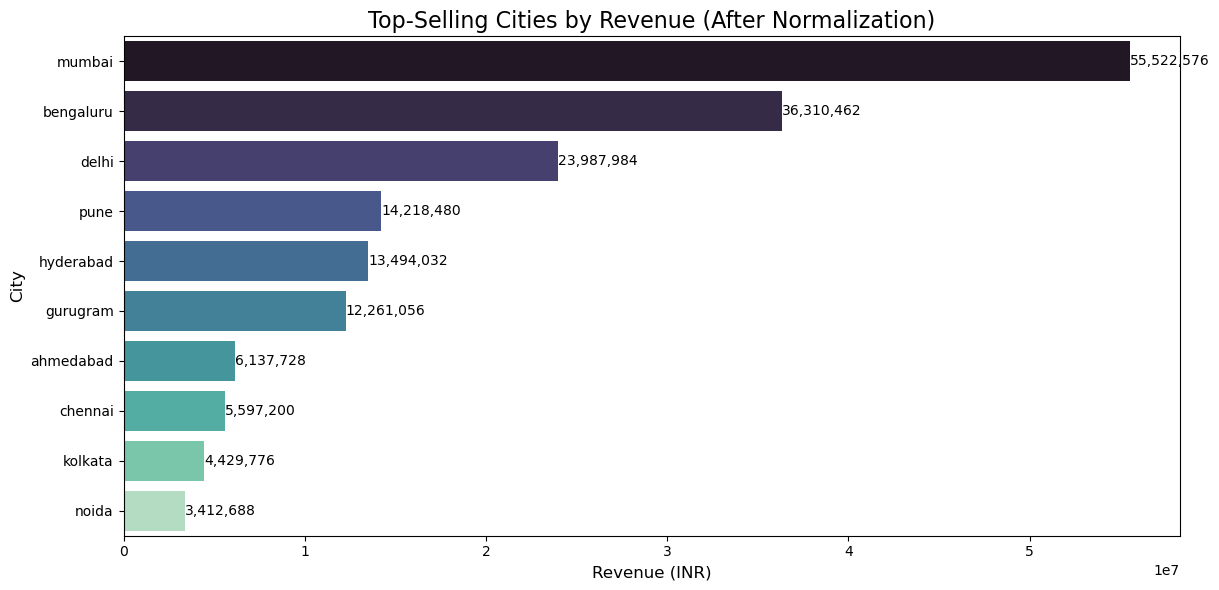

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x="City Revenue", y="Shipping City", palette="mako")
plt.title("Top-Selling Cities by Revenue (After Normalization)", fontsize=16)
plt.xlabel("Revenue (INR)", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.tight_layout()

for index, value in enumerate(top_cities['City Revenue']):
    plt.text(value + 1000, index, f'{value:,.0f}', va='center', fontsize=10)

plt.show()

In [12]:
sizes = sorted(["XS", "S", "M", "L", "XL", "XXL"], key=len, reverse=True)
colors = sorted(["Black", "Bliss Black", "Bullbull Burgundy", "Burgundy", "Naina Navy", "Navy"], key=len, reverse=True)

def extract_size(product):
    for size in sizes:
        if size in product:
            return size
    return "Unknown Size"

def extract_color(product):
    for color in colors:
        if color in product:
            return color
    return "Unknown Color"

db['Size'] = db['Product'].apply(extract_size)
db['Color'] = db['Product'].apply(extract_color)

print(db[['Product', 'Size', 'Color']].sample(10))

                                                  Product Size          Color
81898                    The Ultimate Leggings - XS-elene   XS  Unknown Color
115206  The Ultimate Leggings - Burgundy - XL-una [PRE...   XL       Burgundy
38219                     The Ultimate Leggings - S-elene    S  Unknown Color
36682   The Ultimate Leggings - L-una [ PRE-ORDER APRI...    S  Unknown Color
67140                       The Ultimate Leggings - M-aia    M  Unknown Color
35240                       The Ultimate Leggings - M-aia    M  Unknown Color
89039   The Ultimate Leggings - XXL-una [PRE-ORDER: DI...  XXL  Unknown Color
40499                      The Ultimate Leggings - XL-una   XL  Unknown Color
39507                      The Ultimate Leggings - XL-una   XL  Unknown Color
94674   The Ultimate Leggings - XXL-una [PRE-ORDER: DI...  XXL  Unknown Color


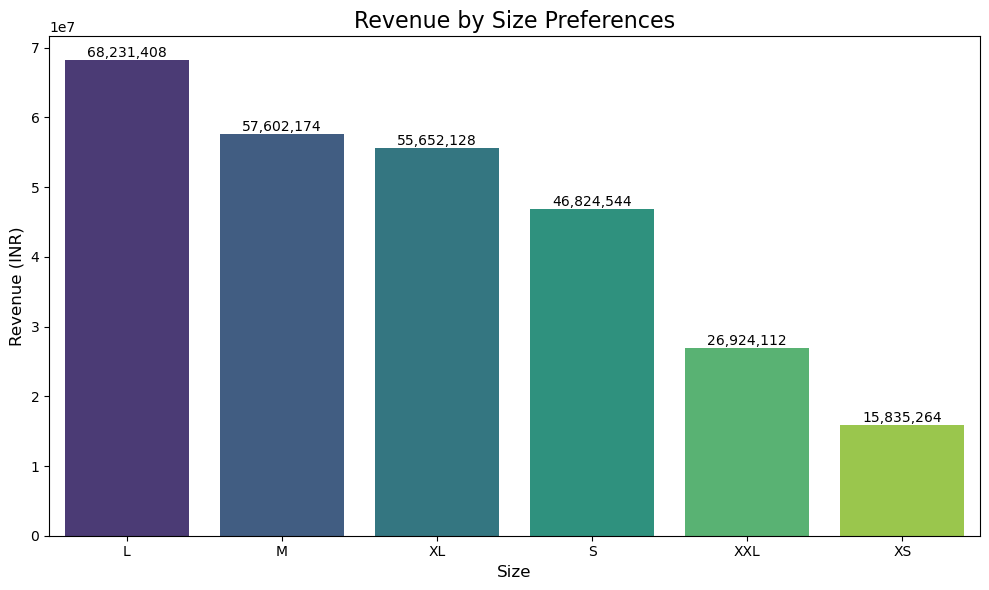

In [13]:
size_trends = db.groupby('Size')['Total'].sum().reset_index(name='Revenue').sort_values(by='Revenue', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=size_trends, x='Size', y='Revenue', palette='viridis')
plt.title("Revenue by Size Preferences", fontsize=16)
plt.xlabel("Size", fontsize=12)
plt.ylabel("Revenue (INR)", fontsize=12)

for index, value in enumerate(size_trends['Revenue']):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

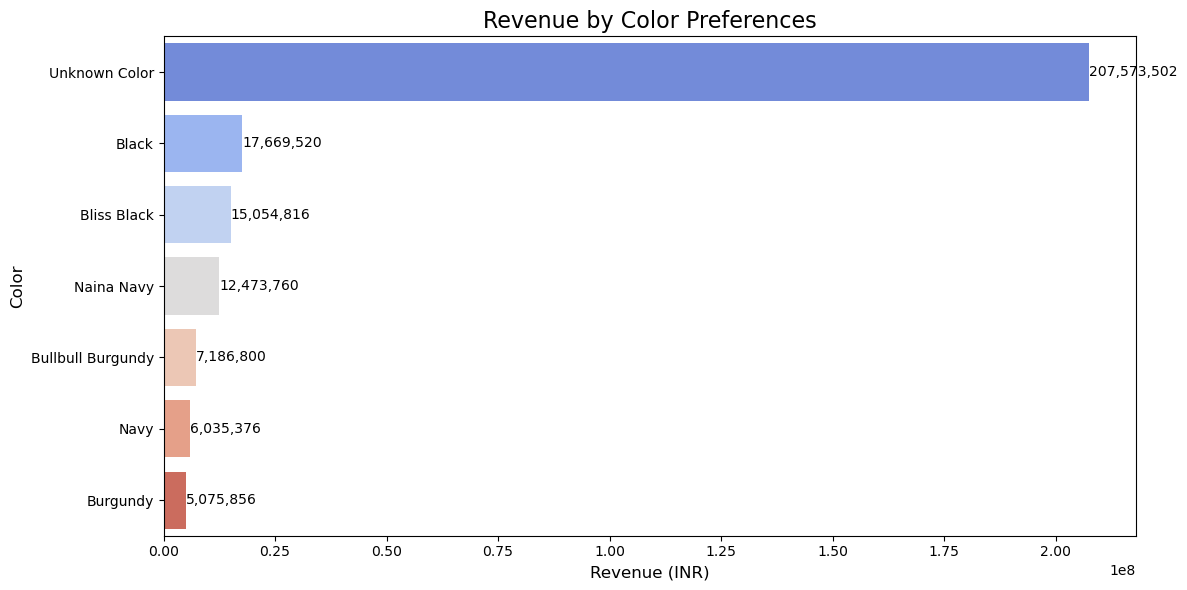

In [14]:
color_trends = db.groupby('Color')['Total'].sum().reset_index(name='Revenue').sort_values(by='Revenue', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=color_trends, x='Revenue', y='Color', palette='coolwarm')
plt.title("Revenue by Color Preferences", fontsize=16)
plt.xlabel("Revenue (INR)", fontsize=12)
plt.ylabel("Color", fontsize=12)

for index, value in enumerate(color_trends['Revenue']):
    plt.text(value, index, f'{value:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [15]:
def classify_order(product):
    if "PRE ORDER" in product.upper() or "PRE-ORDER" in product.upper():
        return "Pre-Order"
    return "Regular"

db['Order Type'] = db['Product'].apply(classify_order)

print(db[['Product', 'Order Type']].sample(10))

                                                  Product Order Type
40336                       The Ultimate Leggings - L-una    Regular
1510                        The Ultimate Leggings - L-una    Regular
124904       The Ultimate Leggings - Bliss Black - XL-una    Regular
99250               The Ultimate Leggings - Black - M-aia    Regular
90786                       The Ultimate Leggings - M-aia    Regular
54661                     The Ultimate Leggings - XXL-una    Regular
99759   The Ultimate Leggings - XS-elene [PRE-ORDER: D...  Pre-Order
41015                       The Ultimate Leggings - M-aia    Regular
129436  The Ultimate Leggings - Bullbull Burgundy - L-...  Pre-Order
118844  The Ultimate Leggings - Bullbull Burgundy - M-...  Pre-Order


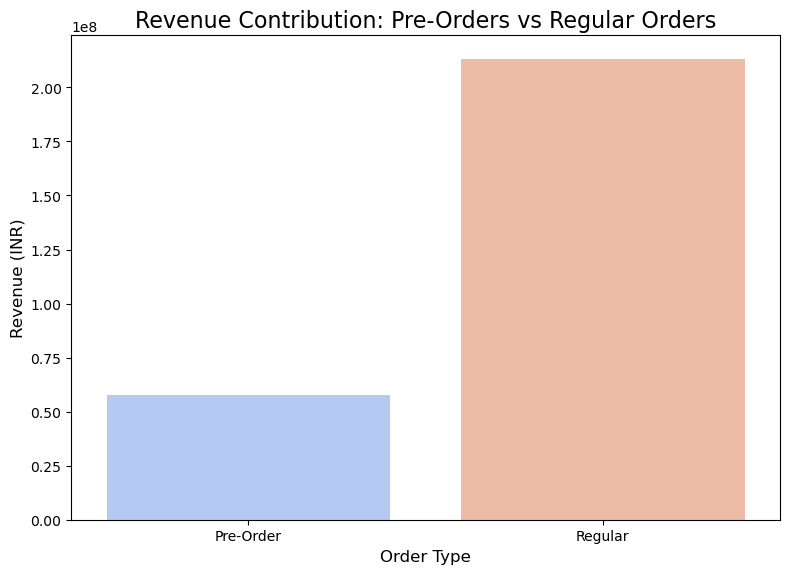

In [16]:
order_type_revenue = db.groupby('Order Type')['Total'].sum().reset_index(name='Revenue')

plt.figure(figsize=(8, 6))
sns.barplot(data=order_type_revenue, x='Order Type', y='Revenue', palette='coolwarm')
plt.title("Revenue Contribution: Pre-Orders vs Regular Orders", fontsize=16)
plt.xlabel("Order Type", fontsize=12)
plt.ylabel("Revenue (INR)", fontsize=12)
plt.tight_layout()
plt.show()

## Optimizing Storage Locations:

In [17]:
storage_trends = db.groupby('Shipping Zip')['Total'].sum().reset_index(name='Zip Revenue').sort_values(by='Zip Revenue', ascending=False)
storage_trends['Cumulative %'] = storage_trends['Zip Revenue'].cumsum() / storage_trends['Zip Revenue'].sum() * 100
storage_trends.head(10)

,Shipping Zip,Zip Revenue,Cumulative %
82,'122002,4116336.0,1.519270
441,'400050,3918032.0,2.965349
444,'400053,2718640.0,3.968754
817,'560037,2398800.0,4.854110
453,'400063,2302848.0,5.704052
443,'400052,2293248.0,6.550451
869,'560103,2109344.0,7.328975
350,'380015,2046976.0,8.084479
850,'560078,2014992.0,8.828178
440,'400049,1983008.0,9.560073


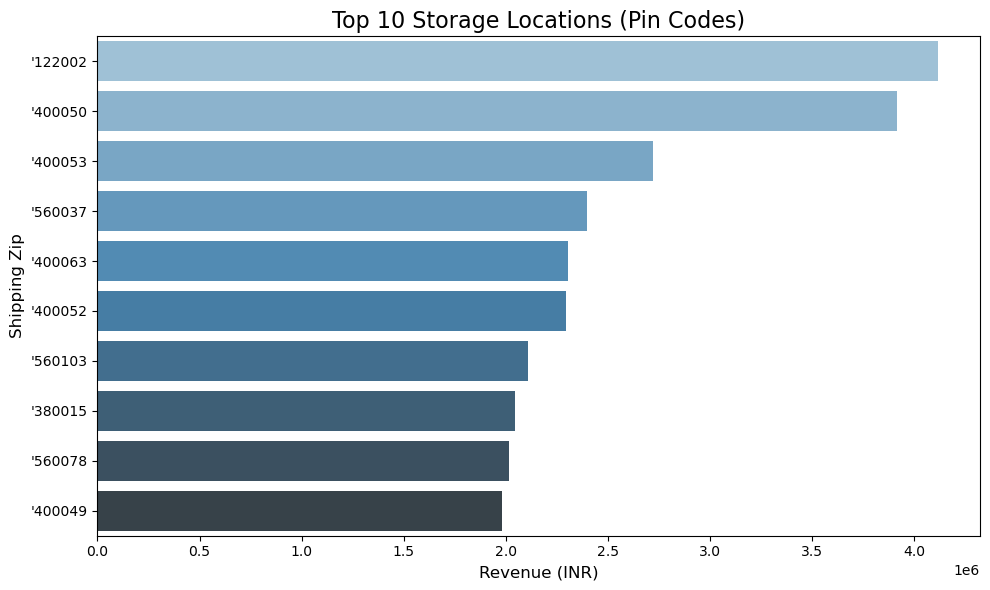

In [18]:
top_storage_trends = storage_trends.sort_values(by="Zip Revenue", ascending=False).head(10)

if not top_storage_trends.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_storage_trends, x="Zip Revenue", y="Shipping Zip", palette="Blues_d")
    plt.title("Top 10 Storage Locations (Pin Codes)", fontsize=16)
    plt.xlabel("Revenue (INR)", fontsize=12)
    plt.ylabel("Shipping Zip", fontsize=12)
    plt.tight_layout()
    plt.show()

In [19]:
pareto_zips = storage_trends[storage_trends['Cumulative %'] <= 80]
print("Zip codes contributing to 80% of revenue:")
print(pareto_zips)

Zip codes contributing to 80% of revenue:
     Shipping Zip  Zip Revenue  Cumulative %
82        '122002    4116336.0      1.519270
441       '400050    3918032.0      2.965349
444       '400053    2718640.0      3.968754
817       '560037    2398800.0      4.854110
453       '400063    2302848.0      5.704052
...           ...          ...           ...
209       '208001     159920.0     79.751906
463       '400074     159920.0     79.810930
1052      '700020     159920.0     79.869954
905       '575028     159920.0     79.928978
306       '313002     159920.0     79.988001

[404 rows x 3 columns]


In [20]:
lat_long_data = pd.read_excel('raw_data_file.xlsx', sheet_name='Lat_long(for ref)')
print(lat_long_data.sample(10))

       Pin code        Lat       Long
11703    610003  10.759067  79.653017
6100     415519  17.544508  74.041763
9795     534268  16.497402  81.795105
11456    604504  12.609508  79.363452
3107     275204  25.720699  83.272008
13965    682041  10.035179  76.292803
8811     516107  14.112895  79.222558
5605     403527  15.673584  73.730133
14627    695143   8.750269  76.762507
13143    641044  11.017439  76.984468


In [21]:
# Remove single quotes and extra spaces from 'Shipping Zip' and 'Pin code'
storage_trends['Shipping Zip'] = storage_trends['Shipping Zip'].astype(str).str.replace("'", "").str.strip()
lat_long_data['Pin code'] = lat_long_data['Pin code'].astype(str).str.strip()

enriched_storage_trends = pd.merge(
    storage_trends,
    lat_long_data,
    left_on='Shipping Zip',
    right_on='Pin code',
    how='left'
)

print(enriched_storage_trends.head())

  Shipping Zip  Zip Revenue  Cumulative % Pin code        Lat       Long
0       122002    4116336.0      1.519270   122002  28.474679  77.104898
1       400050    3918032.0      2.965349   400050  19.055170  72.829952
2       400053    2718640.0      3.968754   400053  19.112105  72.861073
3       560037    2398800.0      4.854110   560037  12.956629  77.704682
4       400063    2302848.0      5.704052   400063  19.164811  72.853272


In [22]:
import folium
from folium.plugins import MarkerCluster

india_center = [20.5937, 78.9629]  # Latitude, Longitude of India

map_india = folium.Map(location=india_center, zoom_start=5, tiles="CartoDB positron")

marker_cluster = MarkerCluster().add_to(map_india)

for _, row in enriched_storage_trends.iterrows():
    if not pd.isna(row['Lat']) and not pd.isna(row['Long']):  # Ensure lat/lon values exist
        folium.CircleMarker(
            location=[row['Lat'], row['Long']],
            radius=row['Zip Revenue'] ** 0.7 / 1000, 
            color="orange",
            fill=True,
            fill_color="orange",
            fill_opacity=0.6,
            tooltip=(
                f"<b>Pin Code:</b> {row['Pin code']}<br>"
                f"<b>Revenue:</b> ₹{row['Zip Revenue']:.2f}"
            ),
        ).add_to(marker_cluster)

map_india.save("india_revenue_map.html")
map_india